In [104]:
# Mounting to Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Load data

In [105]:
# import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re                                  # library for regular expression operations
import string                              # for string operations

import nltk 

# download the stopwords from NLTK
# nltk.download('stopwords')

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# f = open(input_file)

In [ ]:
# data = [json.loads(line) for line in open(input_file, 'r')]

In [ ]:
# data[0]

{'original_message': '<p>I was unable to complete an eBay transaction with my card. I tried twice. First failure so far!</p>',
 'tag1': 'APP - Outage',
 'tag2': None,
 'tag3': None}

In [106]:
input_file = '/content/gdrive/My Drive/Monzo/anonymous_labeled_conversations.json'

In [107]:
data = pd.read_json(input_file, lines=True)

In [108]:
data.head()

,original_message,tag1,tag2,tag3
0,<p>I was unable to complete an eBay transactio...,APP - Outage,None,None
1,"<p>Hi, I still haven't received my mondo card ...",CARD - Not Arrived,None,None
2,"<p>Hey, I'm liking the new app design but ever...",APP - iOS Bug (known),None,None
3,<p>how come i cannot top up more than £100?</p>,KYC - limit driven,None,None
4,<p>I don't recall this transaction</p>,APP - Unrecognized Transaction,None,None


In [6]:
data.shape

(6869, 4)

In [ ]:
data['tag1'].value_counts()

PIN - sent                        1864
CARD - Not Arrived                 756
KYC - limit driven                 742
TOP UP - Bank transfer             613
PAYMENT - REFUND                   525
APP - iOS Bug (known)              474
TRAVEL - TfL transaction query     383
APP - Unrecognized Transaction     378
APP - Outage                       368
TRAVEL - FX rates                  360
DECLINE - Contactless              309
ONBOARDING - £100 amount            97
Name: tag1, dtype: int64

In [ ]:
data['tag1'].value_counts().shape

(12,)

In [ ]:
data['tag2'].value_counts()

PIN - unblock                                   46
TRAVEL - Misc                                   21
APP - Tips & Tricks                             21
TOP UP - Missing load                           16
INFORMATION - limits                            14
                                                ..
QUEUE - Bump                                     1
DECLINE - Timeout                                1
APP - Outage                                     1
TOP UP - Minimum Amount                          1
Top Up - Bank Transfer (incorrect reference)     1
Name: tag2, Length: 91, dtype: int64

In [ ]:
data['tag2'].value_counts().shape

(91,)

In [ ]:
data['tag3'].value_counts()

APP - Tips & Tricks               3
INFORMATION - limits              2
ACCOUNT - Balance Query           1
TOP UP - Limits                   1
APP - Unrecognized Transaction    1
PIN - sent via encrypted PDF      1
PAYMENT - Disputed Transaction    1
P2P - Limit Issue                 1
CARD - Duplicate Mailed           1
Name: tag3, dtype: int64

In [ ]:
data['tag3'].value_counts().shape

(9,)

In [ ]:
pd.unique(data['tag1'].append(data['tag2']).append(data['tag3'])).shape

(101,)

In [ ]:
(data['tag1'].append(data['tag2']).append(data['tag3'])).value_counts().head(10)

PIN - sent                        1866
CARD - Not Arrived                 756
KYC - limit driven                 742
TOP UP - Bank transfer             616
PAYMENT - REFUND                   525
APP - iOS Bug (known)              474
APP - Unrecognized Transaction     384
TRAVEL - TfL transaction query     383
APP - Outage                       369
TRAVEL - FX rates                  366
dtype: int64

In [ ]:
tags_desc = (data['tag1'].append(data['tag2']).append(data['tag3'])).value_counts().reset_index().rename(columns={'index':'tag', 0:'vol'})

In [ ]:
tags_desc.head()

,tag,vol
0,PIN - sent,1866
1,CARD - Not Arrived,756
2,KYC - limit driven,742
3,TOP UP - Bank transfer,616
4,PAYMENT - REFUND,525


In [ ]:
tags_desc['pct'] = tags_desc['vol']/tags_desc['vol'].sum()*100

In [ ]:
tags_desc['pct'][:11].sum()

94.46299387868672

In [ ]:
tags_desc[:11]

,tag,vol,pct
0,PIN - sent,1866,25.959933
1,CARD - Not Arrived,756,10.517529
2,KYC - limit driven,742,10.322760
3,TOP UP - Bank transfer,616,8.569839
4,PAYMENT - REFUND,525,7.303840
5,APP - iOS Bug (known),474,6.594324
6,APP - Unrecognized Transaction,384,5.342237
7,TRAVEL - TfL transaction query,383,5.328325
8,APP - Outage,369,5.133556
9,TRAVEL - FX rates,366,5.091820


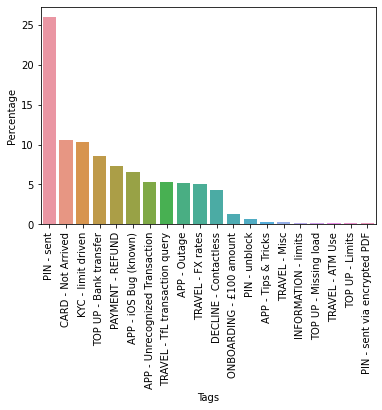

In [ ]:
sns.barplot(x='tag', y='pct', data=tags_desc[:20])
plt.xlabel('Tags')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

In [ ]:
(data['tag1'].append(data['tag2']).append(data['tag3'])).value_counts().shape

(100,)

**Process target variables**

In [ ]:
tag_1 = pd.get_dummies(data['tag1'])
tag_2 = pd.get_dummies(data['tag2'])
tag_3 = pd.get_dummies(data['tag3'])

In [ ]:
tag_1.head()

,APP - Outage,APP - Unrecognized Transaction,APP - iOS Bug (known),CARD - Not Arrived,DECLINE - Contactless,KYC - limit driven,ONBOARDING - £100 amount,PAYMENT - REFUND,PIN - sent,TOP UP - Bank transfer,TRAVEL - FX rates,TRAVEL - TfL transaction query
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
tag_1.shape

(6869, 12)

In [ ]:
tag_2 = pd.get_dummies(data['tag2'])

In [ ]:
tag_2.shape

(6869, 91)

In [ ]:
tag_2.head()

,3DS,ACCOUNT - Balance Query,ACCOUNT - Change Card Delivery Address,ACCOUNT - Duplicate,ACCOUNT - Limit increase request,ACCOUNT - Unban User,APP - Android Bug (Known),APP - Android Bug (Unknown),APP - Balance Transfer,APP - Bet365,APP - Display error,APP - Logout,APP - Missing Feed Item,APP - Outage,APP - Push Notifications,APP - Receipt Upload,APP - Spending,APP - Tips & Tricks,APP - TouchID,APP - Unrecognized Transaction,ATM - International Issues,ATM - limits,CARD - Damaged,CARD - Duplicate Mailed,CARD - ICVV Failure,CARD - Lost,CARD - Mailing,CARD - Monzo,CARD - Replacement,CARD - Royal Mail delays,Careers,DECLINE - Merchant Rejected Card,DECLINE - TFL,DECLINE - Timeout,DECLINE - Unknown,DECLINE - not showing in app,DUPLICATE CONVERSATION,FOLLOW UP - NOAH,FRAUD - Card fraud (Confirmed),FRAUD - Investigating,...,PAYMENT - Betting Site,PAYMENT - Chargeback,PAYMENT - Contactless,PAYMENT - Hanging Auth,PAYMENT - Offline presentment post auth reversal,PAYMENT - Online Issues,PAYMENT - Pay at Pump,PAYMENT - Presentment + Auth,PAYMENT - Transaction Query,PAYMENT - Unexpected Transaction,PIN - sent,PIN - sent via encrypted PDF,PIN - unblock,QUEUE - Bump,TOP UP - 3DS,TOP UP - Bank Transfer (Limits exceeded),TOP UP - Bank Transfer (incorrect reference),TOP UP - Bank blocks Mondo top ups,TOP UP - Bank blocks Monzo top ups,TOP UP - Bank transfer,TOP UP - Bank transfer (international),TOP UP - Bank transfer (no reference),TOP UP - Debit Card,TOP UP - Display error,TOP UP - Limits,TOP UP - Minimum Amount,TOP UP - Misc,TOP UP - Missing load,TOP UP - Missing load (complete),TOP UP - Outage 10/10/16,TOP UP - Refund,TOP UP - unload card,TOP UPS - Misc,TRAVEL - ATM Use,TRAVEL - FX rates,TRAVEL - MTA NYC Decline,TRAVEL - Misc,TRAVEL - Reports,Top Up - Bank Transfer (incorrect reference),Top Up - International Bank Transfer
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tag_1.add(tag_2, fill_value=0, axis='columns').sum(axis=1)>1

0       False
1       False
2       False
3       False
4       False
        ...  
6864    False
6865    False
6866    False
6867    False
6868    False
Length: 6869, dtype: bool

In [ ]:
tag_1.add(tag_2, fill_value=0, axis='columns').clip(upper=1)[tag_1.add(tag_2, fill_value=0, axis='columns').sum(axis=1)>1]

,3DS,ACCOUNT - Balance Query,ACCOUNT - Change Card Delivery Address,ACCOUNT - Duplicate,ACCOUNT - Limit increase request,ACCOUNT - Unban User,APP - Android Bug (Known),APP - Android Bug (Unknown),APP - Balance Transfer,APP - Bet365,APP - Display error,APP - Logout,APP - Missing Feed Item,APP - Outage,APP - Push Notifications,APP - Receipt Upload,APP - Spending,APP - Tips & Tricks,APP - TouchID,APP - Unrecognized Transaction,APP - iOS Bug (known),ATM - International Issues,ATM - limits,CARD - Damaged,CARD - Duplicate Mailed,CARD - ICVV Failure,CARD - Lost,CARD - Mailing,CARD - Monzo,CARD - Not Arrived,CARD - Replacement,CARD - Royal Mail delays,Careers,DECLINE - Contactless,DECLINE - Merchant Rejected Card,DECLINE - TFL,DECLINE - Timeout,DECLINE - Unknown,DECLINE - not showing in app,DUPLICATE CONVERSATION,...,PAYMENT - Contactless,PAYMENT - Hanging Auth,PAYMENT - Offline presentment post auth reversal,PAYMENT - Online Issues,PAYMENT - Pay at Pump,PAYMENT - Presentment + Auth,PAYMENT - REFUND,PAYMENT - Transaction Query,PAYMENT - Unexpected Transaction,PIN - sent,PIN - sent via encrypted PDF,PIN - unblock,QUEUE - Bump,TOP UP - 3DS,TOP UP - Bank Transfer (Limits exceeded),TOP UP - Bank Transfer (incorrect reference),TOP UP - Bank blocks Mondo top ups,TOP UP - Bank blocks Monzo top ups,TOP UP - Bank transfer,TOP UP - Bank transfer (international),TOP UP - Bank transfer (no reference),TOP UP - Debit Card,TOP UP - Display error,TOP UP - Limits,TOP UP - Minimum Amount,TOP UP - Misc,TOP UP - Missing load,TOP UP - Missing load (complete),TOP UP - Outage 10/10/16,TOP UP - Refund,TOP UP - unload card,TOP UPS - Misc,TRAVEL - ATM Use,TRAVEL - FX rates,TRAVEL - MTA NYC Decline,TRAVEL - Misc,TRAVEL - Reports,TRAVEL - TfL transaction query,Top Up - Bank Transfer (incorrect reference),Top Up - International Bank Transfer
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,

In [ ]:
data.iloc[20]

original_message    <p>Why can i not top up more?</p>
tag1                               KYC - limit driven
tag2                                  TOP UP - Limits
tag3                                             None
Name: 20, dtype: object

In [ ]:
tag_1.add(tag_2, fill_value=0, axis='columns').clip(upper=1)

1.0

In [ ]:
tags = tag_1.add(tag_2, fill_value=0, axis='columns').clip(upper=1).add(tag_3, fill_value=0, axis='columns').clip(upper=1)
tags.head()

,3DS,ACCOUNT - Balance Query,ACCOUNT - Change Card Delivery Address,ACCOUNT - Duplicate,ACCOUNT - Limit increase request,ACCOUNT - Unban User,APP - Android Bug (Known),APP - Android Bug (Unknown),APP - Balance Transfer,APP - Bet365,APP - Display error,APP - Logout,APP - Missing Feed Item,APP - Outage,APP - Push Notifications,APP - Receipt Upload,APP - Spending,APP - Tips & Tricks,APP - TouchID,APP - Unrecognized Transaction,APP - iOS Bug (known),ATM - International Issues,ATM - limits,CARD - Damaged,CARD - Duplicate Mailed,CARD - ICVV Failure,CARD - Lost,CARD - Mailing,CARD - Monzo,CARD - Not Arrived,CARD - Replacement,CARD - Royal Mail delays,Careers,DECLINE - Contactless,DECLINE - Merchant Rejected Card,DECLINE - TFL,DECLINE - Timeout,DECLINE - Unknown,DECLINE - not showing in app,DUPLICATE CONVERSATION,FOLLOW UP - NOAH,FRAUD - Card fraud (Confirmed),FRAUD - Investigating,FRAUD - Suspected (Victim),INFORMATION - limits,KYC - Android,KYC - P2P driven,KYC - limit driven,MISC - Duplicate Conversation,...,P2P - Limit Issue,P2P - error message,PAYMENT - Active Card Check,PAYMENT - Auth reversal after 5 days,PAYMENT - Automatic Auth Reversal,PAYMENT - Bank transfers,PAYMENT - Betting Site,PAYMENT - Chargeback,PAYMENT - Contactless,PAYMENT - Disputed Transaction,PAYMENT - Hanging Auth,PAYMENT - Offline presentment post auth reversal,PAYMENT - Online Issues,PAYMENT - Pay at Pump,PAYMENT - Presentment + Auth,PAYMENT - REFUND,PAYMENT - Transaction Query,PAYMENT - Unexpected Transaction,PIN - sent,PIN - sent via encrypted PDF,PIN - unblock,QUEUE - Bump,TOP UP - 3DS,TOP UP - Bank Transfer (Limits exceeded),TOP UP - Bank Transfer (incorrect reference),TOP UP - Bank blocks Mondo top ups,TOP UP - Bank blocks Monzo top ups,TOP UP - Bank transfer,TOP UP - Bank transfer (international),TOP UP - Bank transfer (no reference),TOP UP - Debit Card,TOP UP - Display error,TOP UP - Limits,TOP UP - Minimum Amount,TOP UP - Misc,TOP UP - Missing load,TOP UP - Missing load (complete),TOP UP - Outage 10/10/16,TOP UP - Refund,TOP UP - unload card,TOP UPS - Misc,TRAVEL - ATM Use,TRAVEL - FX rates,TRAVEL - MTA NYC Decline,TRAVEL - Misc,TRAVEL - Reports,TRAVEL - TfL transaction query,Top Up - Bank Transfer (incorrect reference),Top Up - International Bank Transfer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
pd.options.display.max_columns = 99

In [ ]:
tags.head()

,3DS,ACCOUNT - Balance Query,ACCOUNT - Change Card Delivery Address,ACCOUNT - Duplicate,ACCOUNT - Limit increase request,ACCOUNT - Unban User,APP - Android Bug (Known),APP - Android Bug (Unknown),APP - Balance Transfer,APP - Bet365,APP - Display error,APP - Logout,APP - Missing Feed Item,APP - Outage,APP - Push Notifications,APP - Receipt Upload,APP - Spending,APP - Tips & Tricks,APP - TouchID,APP - Unrecognized Transaction,APP - iOS Bug (known),ATM - International Issues,ATM - limits,CARD - Damaged,CARD - Duplicate Mailed,CARD - ICVV Failure,CARD - Lost,CARD - Mailing,CARD - Monzo,CARD - Not Arrived,CARD - Replacement,CARD - Royal Mail delays,Careers,DECLINE - Contactless,DECLINE - Merchant Rejected Card,DECLINE - TFL,DECLINE - Timeout,DECLINE - Unknown,DECLINE - not showing in app,DUPLICATE CONVERSATION,FOLLOW UP - NOAH,FRAUD - Card fraud (Confirmed),FRAUD - Investigating,FRAUD - Suspected (Victim),INFORMATION - limits,KYC - Android,KYC - P2P driven,KYC - limit driven,MISC - Duplicate Conversation,...,P2P - Limit Issue,P2P - error message,PAYMENT - Active Card Check,PAYMENT - Auth reversal after 5 days,PAYMENT - Automatic Auth Reversal,PAYMENT - Bank transfers,PAYMENT - Betting Site,PAYMENT - Chargeback,PAYMENT - Contactless,PAYMENT - Disputed Transaction,PAYMENT - Hanging Auth,PAYMENT - Offline presentment post auth reversal,PAYMENT - Online Issues,PAYMENT - Pay at Pump,PAYMENT - Presentment + Auth,PAYMENT - REFUND,PAYMENT - Transaction Query,PAYMENT - Unexpected Transaction,PIN - sent,PIN - sent via encrypted PDF,PIN - unblock,QUEUE - Bump,TOP UP - 3DS,TOP UP - Bank Transfer (Limits exceeded),TOP UP - Bank Transfer (incorrect reference),TOP UP - Bank blocks Mondo top ups,TOP UP - Bank blocks Monzo top ups,TOP UP - Bank transfer,TOP UP - Bank transfer (international),TOP UP - Bank transfer (no reference),TOP UP - Debit Card,TOP UP - Display error,TOP UP - Limits,TOP UP - Minimum Amount,TOP UP - Misc,TOP UP - Missing load,TOP UP - Missing load (complete),TOP UP - Outage 10/10/16,TOP UP - Refund,TOP UP - unload card,TOP UPS - Misc,TRAVEL - ATM Use,TRAVEL - FX rates,TRAVEL - MTA NYC Decline,TRAVEL - Misc,TRAVEL - Reports,TRAVEL - TfL transaction query,Top Up - Bank Transfer (incorrect reference),Top Up - International Bank Transfer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

**Input text process & analysis**

In [7]:
data.head()

,original_message,tag1,tag2,tag3
0,<p>I was unable to complete an eBay transactio...,APP - Outage,None,None
1,"<p>Hi, I still haven't received my mondo card ...",CARD - Not Arrived,None,None
2,"<p>Hey, I'm liking the new app design but ever...",APP - iOS Bug (known),None,None
3,<p>how come i cannot top up more than £100?</p>,KYC - limit driven,None,None
4,<p>I don't recall this transaction</p>,APP - Unrecognized Transaction,None,None


In [77]:
text_raw = "<p>I've lost me pin \ud83d\ude31</p>"

In [78]:
emoji_pattern = re.compile(
    u"(\ud83d[\ude00-\ude4f])|"  # emoticons
    u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
    u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
    u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
    u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
    "+", flags=re.UNICODE)

In [80]:
# remove
text = text_raw.lower()
text = emoji_pattern.sub(r'', text)
text = re.sub(r'<.*?>', '', text)
text = re.sub(r'\n', '', text)
text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
text = re.sub('\w*\d\w*', '', text)
print(text)

ive lost me pin 


In [110]:
def clean_text(text):
  """Make lower case, remove emoji, remove http tags, remove new line, remove punctuation, remove numbers"""
  
  emoji_pattern = re.compile(
    u"(\ud83d[\ude00-\ude4f])|"  # emoticons
    u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
    u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
    u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
    u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
    "+", flags=re.UNICODE)

  text = text.lower()
  text = emoji_pattern.sub(r'', text)
  text = re.sub(r'<.*?>', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\w*\d\w*', '', text)

  return text

Reference: https://www.kaggle.com/parulpandey/eda-and-preprocessing-for-bert

In [81]:
clean_text(text_raw)

'ive lost me pin '

In [111]:
data['message_clean'] = data['original_message'].apply(lambda x: clean_text(x))

In [112]:
data[['original_message', 'message_clean']].head()

,original_message,message_clean
0,<p>I was unable to complete an eBay transactio...,i was unable to complete an ebay transaction w...
1,"<p>Hi, I still haven't received my mondo card ...",hi i still havent received my mondo card and i...
2,"<p>Hey, I'm liking the new app design but ever...",hey im liking the new app design but ever sinc...
3,<p>how come i cannot top up more than £100?</p>,how come i cannot top up more than £
4,<p>I don't recall this transaction</p>,i dont recall this transaction


In [113]:
data['word_count'] = data['message_clean'].apply(lambda x: len(str(x).split()))

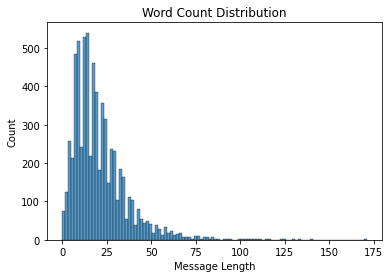

In [138]:
sns.histplot(data['word_count'])
plt.title('Word Count Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

In [115]:
data['word_count'].mean()

21.04789634590188

In [116]:
data['word_count'].median()

18.0

In [154]:
data['word_count'].max()

171

In [117]:
data['message_clean'][data['word_count']<=4]

6                  hey
8                hello
57           hey there
79               hello
103              hello
             ...      
6666      top up limit
6701          hi there
6790    quick question
6803          hey guys
6811          hi there
Name: message_clean, Length: 282, dtype: object

In [83]:
data.head()

,original_message,tag1,tag2,tag3,message_clean,word_count
0,<p>I was unable to complete an eBay transactio...,APP - Outage,None,None,i was unable to complete an ebay transaction w...,18
1,"<p>Hi, I still haven't received my mondo card ...",CARD - Not Arrived,None,None,hi i still havent received my mondo card and i...,32
2,"<p>Hey, I'm liking the new app design but ever...",APP - iOS Bug (known),None,None,hey im liking the new app design but ever sinc...,36
3,<p>how come i cannot top up more than £100?</p>,KYC - limit driven,None,None,how come i cannot top up more than £,9
4,<p>I don't recall this transaction</p>,APP - Unrecognized Transaction,None,None,i dont recall this transaction,5


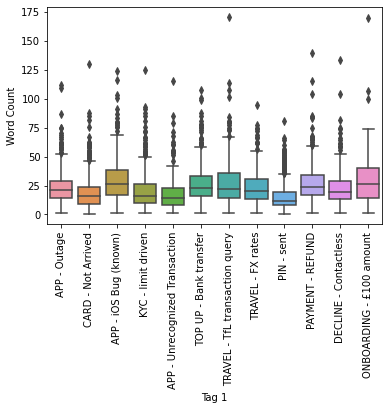

In [88]:
sns.boxplot(x='tag1', y='word_count', data=data)
plt.xlabel('Tag 1')
plt.ylabel('Word Count')
plt.xticks(rotation=90)
plt.show()

In [91]:
vec = CountVectorizer(stop_words = 'english').fit(data['message_clean'])

In [93]:
bag_of_words = vec.transform(data['message_clean'])

In [95]:
bag_of_words.sum(axis=0)

matrix([[216,   4, 152, ...,   1,   1,   1]], dtype=int64)

In [118]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [161]:
top_20 = get_top_n_words(data['message_clean'],20)
top_20_df = pd.DataFrame(top_20, columns=['text', 'count'])

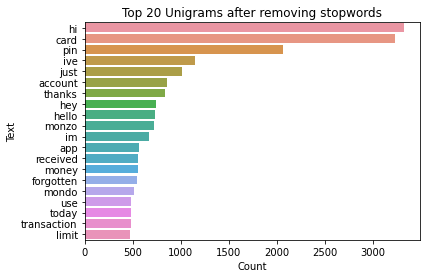

In [163]:
# plt.figure(figsize=(12,10))
sns.barplot(x='count', y='text', data=top_20_df, orient='h')
plt.title('Top 20 Unigrams after removing stopwords')
plt.ylabel('Text')
plt.xlabel('Count')
plt.show()

In [151]:
stopwords_e = stopwords.words('english')

In [152]:
stopwords_e_add = stopwords_e + ['hey', 'hi', 'hello', 'ive', 'just', 'im']